# 1.IMPORT LIBRARIES

In [33]:
#!pip install lazypredict    #This is the library called lazy predict used for predicting accuracy for all models that are present in classification or regression. 
import pandas as pd       
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
pd.pandas.set_option('display.max_columns', None)

# 2.IMPORT DATA

In [34]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Doon School/signal-data.csv',index_col = 'Time')
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.73,1411.13,1.36,100.00,97.61,0.12,1.50,0.02,-0.00,0.95,202.44,0.00,7.96,414.87,10.04,0.97,192.40,12.52,1.40,-5419.00,2916.50,-4043.75,751.00,0.90,1.77,3.05,64.23,2.02,0.16,3.52,83.40,9.51,50.62,64.26,49.38,66.31,86.96,117.51,61.29,4.51,70.00,352.72,10.18,130.37,723.31,1.31,141.23,1.00,624.31,218.32,0.00,4.59,4.84,2834.00,0.93,0.95,4.71,-1.73,350.93,10.62,108.64,16.14,21.73,29.54,693.77,0.92,148.60,1.00,608.17,84.08,nan,nan,0.00,0.01,-0.02,0.01,-0.03,-0.01,-0.00,-0.06,-0.00,7.22,0.13,nan,2.39,0.97,1747.60,0.18,8671.93,-0.33,-0.01,-0.00,0.00,0.00,-0.28,0.00,0.40,-0.03,0.00,0.00,0.14,-0.00,0.00,0.01,0.00,-0.25,0.32,nan,nan,nan,nan,0.95,0.00,748.61,0.99,58.43,0.60,0.98,6.38,15.88,2.64,15.94,15.93,0.87,3.35,0.41,3.19,-0.05,0.72,1.00,2.30,1000.73,39.24,123.00,111.30,75.20,46.20,350.67,0.39,0.00,6.78,0.00,0.09,0.09,0.04,0.03,12.26,0.00,4.27,10.28,0.47,0.02,11.89,0.41,0.05,nan,nan,1017.00,967.00,1066.00,368.00,0.09,0.05,0.10,2.00,0.90,0.07,0.05,0.72,0.11,0.32,0.59,0.32,0.95,0.40,0.16,0.00,0.00,20.95,0.33,12.49,16.71,0.08,5.72,0.00,11.19,65.36,0.00,0.00,0.00,0.00,0.00,0.00,0.29,5.38,20.10,0.30,

# 3.DATA PREPROCESSING

- Check NAN Values- As NAN values are present and there are some features that are NAN more than 50% however we are going to replace using KNN imputer method.
- Data having 589 features and each features have there own unit, To get on all variable on one unit I used standardization method.

- To tackle with Outliers and as we have 589 features that ay create more noise in data to tackle with this problem, we are going to used PCA that is principal component analysis.
- Output category contains -1 and 1 values and these values data is not balanced as -1 category have more values as compare to 1, using imbalanced library I undersampled the category values and make it balanced.



In [35]:
for i in train.columns:                                # Check NAN Values.
    print (i+": "+str(train[i].isna().sum()))

0: 6
1: 7
2: 14
3: 14
4: 14
5: 14
6: 14
7: 9
8: 2
9: 2
10: 2
11: 2
12: 2
13: 3
14: 3
15: 3
16: 3
17: 3
18: 3
19: 10
20: 0
21: 2
22: 2
23: 2
24: 2
25: 2
26: 2
27: 2
28: 2
29: 2
30: 2
31: 2
32: 1
33: 1
34: 1
35: 1
36: 1
37: 1
38: 1
39: 1
40: 24
41: 24
42: 1
43: 1
44: 1
45: 1
46: 1
47: 1
48: 1
49: 1
50: 1
51: 1
52: 1
53: 4
54: 4
55: 4
56: 4
57: 4
58: 4
59: 7
60: 6
61: 6
62: 6
63: 7
64: 7
65: 7
66: 6
67: 6
68: 6
69: 6
70: 6
71: 6
72: 794
73: 794
74: 6
75: 24
76: 24
77: 24
78: 24
79: 24
80: 24
81: 24
82: 24
83: 1
84: 12
85: 1341
86: 0
87: 0
88: 0
89: 51
90: 51
91: 6
92: 2
93: 2
94: 6
95: 6
96: 6
97: 6
98: 6
99: 6
100: 6
101: 6
102: 6
103: 2
104: 2
105: 6
106: 6
107: 6
108: 6
109: 1018
110: 1018
111: 1018
112: 715
113: 0
114: 0
115: 0
116: 0
117: 0
118: 24
119: 0
120: 0
121: 9
122: 9
123: 9
124: 9
125: 9
126: 9
127: 9
128: 9
129: 9
130: 9
131: 9
132: 8
133: 8
134: 8
135: 5
136: 6
137: 7
138: 14
139: 14
140: 14
141: 14
142: 14
143: 9
144: 2
145: 2
146: 2
147: 2
148: 2
149: 3
150: 3
151: 3
152

In [36]:
from sklearn.impute import KNNImputer                         #This imputer used to fill nan values as values that are near to that particular columns values and based on n_neighbors value it consider that much of sample.
imp_mean = KNNImputer(missing_values=np.nan,n_neighbors =5)
train1 = imp_mean.fit_transform(train)


In [37]:
train1 = pd.DataFrame(train1)
train1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.73,1411.13,1.36,100.00,97.61,0.12,1.50,0.02,-0.00,0.95,202.44,0.00,7.96,414.87,10.04,0.97,192.40,12.52,1.40,-5419.00,2916.50,-4043.75,751.00,0.90,1.77,3.05,64.23,2.02,0.16,3.52,83.40,9.51,50.62,64.26,49.38,66.31,86.96,117.51,61.29,4.51,70.00,352.72,10.18,130.37,723.31,1.31,141.23,1.00,624.31,218.32,0.00,4.59,4.84,2834.00,0.93,0.95,4.71,-1.73,350.93,10.62,108.64,16.14,21.73,29.54,693.77,0.92,148.60,1.00,608.17,84.08,114.85,506.68,0.00,0.01,-0.02,0.01,-0.03,-0.01,-0.00,-0.06,-0.00,7.22,0.13,0.11,2.39,0.97,1747.60,0.18,8671.93,-0.33,-0.01,-0.00,0.00,0.00,-0.28,0.00,0.40,-0.03,0.00,0.00,0.14,-0.00,0.00,0.01,0.00,-0.25,0.32,0.98,100.82,233.49,0.46,0.95,0.00,748.61,0.99,58.43,0.60,0.98,6.38,15.88,2.64,15.94,15.93,0.87,3.35,0.41,3.19,-0.05,0.72,1.00,2.30,1000.73,39.24,123.00,111.30,75.20,46.20,350.67,0.39,0.00,6.78,0.00,0.09,0.09,0.04,0.03,12.26,0.00,4.27,10.28,0.47,0.02,11.89,0.41,0.05,0.09,1257.28,1017.00,967.00,1066.00,368.00,0.09,0.05,0.10,2.00,0.90,0.07,0.05,0.72,0.11,0.32,0.59,0.32,0.95,0.40,0.16,0.00,0.00,20.95,0.33,12.49,16.71,0.08,5.72,0.00,11.19,65.36,0.00,0.00,0.00,0.00,0.00,0.00,0.29,5.38,20.10,0.30,10.62,10.30,5.38,4.04,16.23,0.30,8.64,0.00,10.30,97.31,0.00,0.08,0.06,0.07,0.05,0.07,0.05,0.03,0.11,3.48,0.00,0.01,0.07,0.02,175.22,0.03,1940.40,0.00,0.07,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.59,4.30,0.05,0.02,0.00,219.95,0.00,2.84,0.02,0.01,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,40.85,4.52,30.98,33.96,22.91,15.95,110.21,0.13,0.00,2.59,0.00,0.03,0.02,0.01,0.01,3.93,0.00,1.51,3.58,0.13,0.01,3.84,0.11,0.02,0.03,415.20,418.14,398.32,496.16,158.33,0.04,0.02,0.05,0.61,0.30,0.02,0.02,0.28,0.04,0.13,0.24,0.13,0.37,0.14,0.06,0

In [38]:
train1.rename(columns = {590:'Pass/Fail'},inplace = True)  #Replace name for target value.

In [39]:
X, y = train1.drop('Pass/Fail', axis = 1), train1 ['Pass/Fail']   # Assign dependent and independent variable.

X = np.array(X)                 #Convert values in array form.
y = np.array(y)


from sklearn.preprocessing import StandardScaler    #using standardization we are going to convert values that having mean of 0 and standar deviation of 1.

scaler = StandardScaler()
std_X = scaler.fit_transform(X)

In [40]:
from sklearn.decomposition import PCA   # PCA used for reducing diamensionality and dealing with outliers

for components in range(100, 150):       # Check at what count,best variance will achieve.
    pca = PCA(n_components = components)
    pca.fit(std_X)
    print('Explained variance for ', components, 'is: ', sum(pca.explained_variance_ratio_))

Explained variance for  100 is:  0.82732143740085
Explained variance for  101 is:  0.8300908227075393
Explained variance for  102 is:  0.8327248761224879
Explained variance for  103 is:  0.8350503982523574
Explained variance for  104 is:  0.837691405072691
Explained variance for  105 is:  0.8399686895624985
Explained variance for  106 is:  0.8424202253057842
Explained variance for  107 is:  0.8448594921565048
Explained variance for  108 is:  0.8471930460460005
Explained variance for  109 is:  0.8495689435940452
Explained variance for  110 is:  0.8518377241504544
Explained variance for  111 is:  0.8537942217850356
Explained variance for  112 is:  0.8562487249962465
Explained variance for  113 is:  0.8582339016054793
Explained variance for  114 is:  0.8605599327886684
Explained variance for  115 is:  0.862501621796872
Explained variance for  116 is:  0.8648619627856253
Explained variance for  117 is:  0.8667073573693286
Explained variance for  118 is:  0.8688302451570475
Explained varian

In [41]:
pca = PCA(n_components = 140)       # 140 variables gives variance of 90 % so we are reducing component from 589 to 140.
X_PCA = pca.fit_transform(std_X)

In [42]:
# Below data visualization we saw that data is imbalanced so to manage data we have to first manage data using imbalanced library.
#!pip install imblearn
!pip install Delayed
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams




# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_PCA,y)

X_res.shape,y_res.shape 

((2926, 140), (2926,))

# 4.DATA VISUALIZATION

- Check Count of output variable.
- Check whether data contains skewness or not.
- 

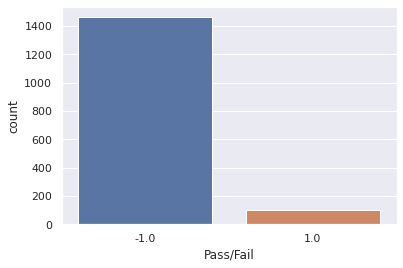

In [43]:
sns.countplot(train1['Pass/Fail']);

In [44]:
from scipy.stats import norm, skew

right_skewed, left_skewed, no_skeweness = 0, 0, 0

for col in list(set(train1.columns) - set(['Pass/Fail'])):
    if skew(train1[col])>0:
        right_skewed+=1        
    elif skew(train1[col])==0:
        no_skeweness+=1
    else:
        left_skewed+=1

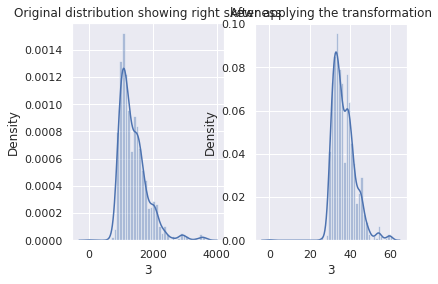

<Figure size 720x576 with 0 Axes>

In [45]:
fig, axes = plt.subplots(1, 2);
plt.figure(figsize = (10,8));
sns.distplot(train1[3], ax=axes[0]);
axes[0].set_title("Original distribution showing right skewness");
sns.distplot(np.sqrt(train1[3]), ax=axes[1]);
axes[1].set_title('After applying the transformation');

# 5.DATA VALIDATION
- Kfold cross validation method used for splitting data into train and test set.

In [46]:
# I used previously, Startified train-test-split and I got less accuracy as compared to kfold cv.
from sklearn.model_selection import StratifiedKFold  
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(X_res, y_res)

5

In [47]:
for train_index, test_index in skf.split(X_res, y_res):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_res[train_index], X_res[test_index]
        y_train, y_test = y_res[train_index], y_res[test_index]

TRAIN: [ 342  343  345 ... 2923 2924 2925] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  1

# 6.MODEL BUILDING

- Lazy predict classifier used to find out best fit model for the above data.
- Using lazy predict I chose to go with random forest classifier.
- As random forest giving 99% accuracy I did hyperparameter tuning. and find outs best parameter for the model.

In [48]:
from lazypredict.Supervised import LazyClassifier    # This method alco called lazy learner and using this I checked which algorithm gives better accuracy based on this I chose to go with randomforest.


clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:46<00:00,  1.60s/it]


In [49]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
ExtraTreesClassifier               1.00               1.00     1.00      1.00   
SVC                                1.00               1.00     1.00      1.00   
RandomForestClassifier             0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.99     0.99      0.99   
NuSVC                              0.99               0.99     0.99      0.99   
XGBClassifier                      0.98               0.98     0.98      0.98   
BaggingClassifier                  0.96               0.96     0.96      0.96   
AdaBoostClassifier                 0.87               0.87     0.87      0.87   
LinearSVC                          0.86               0.86     0.86      0.86   
LogisticRegression          

In [50]:
from sklearn.ensemble import RandomForestClassifier  


clf = RandomForestClassifier()

clf.fit(X_train,y_train)
y_predicted = clf.predict(X_test)
score = clf.score(X_test,y_test)


print(score)

0.9965811965811966


- As we get 99% accuracy, That means our model may be overfitted.
- Lets check with hyperparameter.

# 7.PERFORMANCE MATRIX
 
 - ROC AUC score used to show performance of model
 - Using classification report, showed precision, recall, and F1-score.
 - I also used confusion matrix to check how many values are wrongly predicted. 

In [51]:
from sklearn.metrics import mean_squared_error     
from sklearn.metrics import roc_auc_score, classification_report

print( 'Train roc auc score for random: ', roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))   #as you can see roc and auc score for training data set is 100.
print( 'Test roc auc score for random: ', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))      # for test data we get roc aus score is 99.

Train roc auc score for random:  1.0
Test roc auc score for random:  0.999906493992239


In [52]:
print(classification_report(y_test, clf.predict(X_test)))   #Using classification report we are going to predict precision, recall, F1-score for predicted values.

              precision    recall  f1-score   support

        -1.0       0.99      1.00      1.00       292
         1.0       1.00      0.99      1.00       293

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



In [53]:
from sklearn.metrics import confusion_matrix    # This is performance matrix. this show how perfectly our model predict the true positive,
# False positive, True negative, false negative values.

cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[292,   0],
       [  2, 291]])

In [54]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [55]:
classes = train1["Pass/Fail"].value_counts()
classes.index = [str(x) for x in classes.index]


Confusion matrix, without normalization
[[292   0]
 [  2 291]]
Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


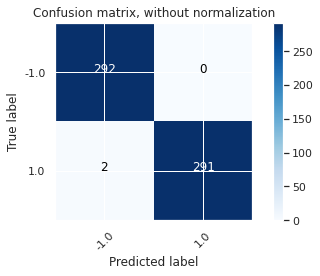

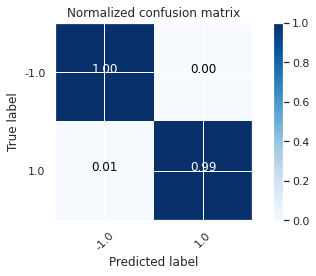

In [56]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.index,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= classes.index, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# 8.HYPERPARAMETER TUNING
- Randomized search Cv used to do tuning.
- Parameter define and assgin to Random forest classifier.
- using best params find out best parameter.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [59]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
rf = RandomForestClassifier()

In [60]:
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='accuracy', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   3.2s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 34.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 600}

In [64]:
rf = RandomForestClassifier(n_estimators= 600,min_samples_split =  5, min_samples_leaf =  2, max_features = 'auto',max_depth = 20)

rf.fit(X_train,y_train)
score = rf.score(X_test,y_test) 
y_predicted = rf.predict(X_test)
print(score)

0.9965811965811966


In [63]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[292,   0],
       [  2, 291]])